In [1]:
# Load in our libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')


from keras.utils import to_categorical
from keras import models
from keras import layers

Using TensorFlow backend.


In [25]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [29]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train['Embarked'].plt('bar')

AttributeError: 'Series' object has no attribute 'plt'

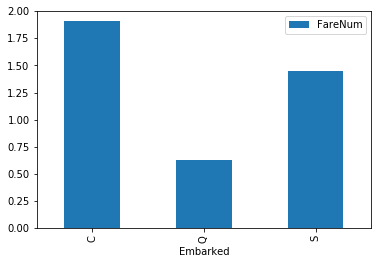

In [19]:
train[['FareNum','Embarked']].groupby(['Embarked']).mean().plot.bar()

In [22]:
print(train.groupby(['FareNum','Embarked'])['FareNum'].count())

FareNum  Embarked
0.0      C            34
         Q            51
         S           156
1.0      C            21
         Q             6
         S           189
2.0      C            39
         Q            18
         S           155
3.0      C            74
         Q             2
         S           144
Name: FareNum, dtype: int64


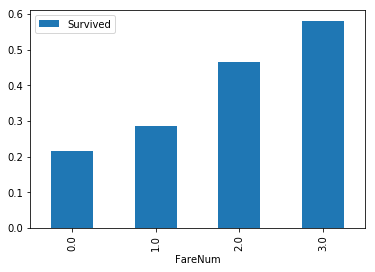

In [24]:
train[['FareNum','Survived']].groupby(['FareNum']).mean().plot.bar()

In [27]:
train['Embarked'].fillna('S',inplace=True)
test['Embarked'].fillna('S',inplace=True)
train['Age'].fillna(train['Age'].mean(),inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [30]:
train.loc[ train['Fare'] <= 8, 'FareNum'] = 0
train.loc[(train['Fare'] > 8) & (train['Fare'] <= 14.5), 'FareNum'] = 1
train.loc[(train['Fare'] > 14.5) & (train['Fare'] <= 31), 'FareNum'] = 2
train.loc[ train['Fare'] > 31, 'FareNum'] = 3

test.loc[ test['Fare'] <= 8, 'FareNum']  = 0
test.loc[(test['Fare'] > 8) & (test['Fare'] <= 14.5), 'FareNum'] = 1
test.loc[(test['Fare'] > 14.5) & (test['Fare'] <= 31), 'FareNum'] = 2
test.loc[ test['Fare'] > 31, 'FareNum'] = 3


In [31]:
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareNum,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0


In [32]:
train['SexNum'] = train["Sex"].map(lambda x: {'male':0,'female':1}.get(x, 2))
test['SexNum'] = train["Sex"].map(lambda x: {'male':0,'female':0}.get(x, 2))
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareNum,Has_Cabin,SexNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0,1


In [33]:
train['EmbarkedNum'] = train['Embarked'].map(lambda x: {'S':1,'C':2,'Q':0}.get(x, 3))
test['EmbarkedNum'] = test['Embarked'].map(lambda x: {'S':1,'C':2,'Q':0}.get(x, 3))
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareNum,Has_Cabin,SexNum,EmbarkedNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,1,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0,1,1


In [34]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareNum,Has_Cabin,SexNum,EmbarkedNum,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,1,1,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,1,1,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,0,0,1,Mr


In [36]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
FareNum        891 non-null float64
Has_Cabin      891 non-null int64
SexNum         891 non-null int64
EmbarkedNum    891 non-null int64
Title          891 non-null object
dtypes: float64(3), int64(8), object(6)
memory usage: 118.4+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FareNum,Has_Cabin,SexNum,EmbarkedNum
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.465769,0.228956,0.352413,1.102132
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.135587,0.420397,0.477990,0.514624
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000,1.000000,2.000000


In [47]:
print(train.groupby(['Title','Sex'])['Sex'].count())
#train[['Title','Sex']].groupby(['Sex']).plot.bar()

Title     Sex   
Capt      male        1
Col       male        2
Countess  female      1
Don       male        1
Dr        female      1
          male        6
Jonkheer  male        1
Lady      female      1
Major     male        2
Master    male       40
Miss      female    182
Mlle      female      2
Mme       female      1
Mr        male      517
Mrs       female    125
Ms        female      1
Rev       male        6
Sir       male        1
Name: Sex, dtype: int64


In [48]:
train['Title_num'] = train["Title"].apply(lambda x: {'Miss':0,'Mlle':0,'Ms':0,'Mme':1,'Mrs':1,'Mr':2,'Master':3}.get(x,4))
test['Title_num'] = test["Title"].apply(lambda x: {'Miss':0,'Mlle':0,'Ms':0,'Mme':1,'Mrs':1,'Mr':2,'Master':3}.get(x,4))
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareNum,Has_Cabin,SexNum,EmbarkedNum,Title,Title_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0.0,0,0,1,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,3.0,1,1,2,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0,1,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,3.0,1,1,1,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1.0,0,0,1,Mr,2
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,1.0,0,0,0,Mr,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,3.0,1,0,1,Mr,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,2.0,0,0,1,Master,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,1.0,0,1,1,Mrs,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,2.0,0,1,2,Mrs,1


In [ ]:
train.describe()
train.info()

In [52]:
train['NameLen'] = train['Name'].apply(len)
test['NameLen'] = test['Name'].apply(len)
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareNum,Has_Cabin,SexNum,EmbarkedNum,Title,Title_num,NameLen
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0,0,1,Mr,2,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,1,1,2,Mrs,1,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0,1,1,Miss,0,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,1,1,1,Mrs,1,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,0,0,1,Mr,2,24


In [53]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FareNum,Has_Cabin,SexNum,EmbarkedNum,Title_num,NameLen
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.465769,0.228956,0.352413,1.102132,1.539843,26.965208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.135587,0.420397,0.477990,0.514624,0.953607,9.281607
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,1.000000,1.000000,20.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000,2.000000,25.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,0.000000,1.000000,1.000000,2.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000,1.000000,2.000000,4.000000,82.000000


In [60]:
train['CategoricalFare'] = pd.qcut(train['NameLen'], 5)
train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FareNum,Has_Cabin,SexNum,EmbarkedNum,Title,Title_num,NameLen,CategoricalFare,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,S,0.0,0,0,1,Mr,2,23,"(19.0, 23.0]",False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,C,3.0,1,1,2,Mrs,1,51,"(32.0, 82.0]",False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,S,0.0,0,1,1,Miss,0,22,"(19.0, 23.0]",True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,S,3.0,1,1,1,Mrs,1,44,"(32.0, 82.0]",False
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,S,1.0,0,0,1,Mr,2,24,"(23.0, 27.0]",True
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,...,Q,1.0,0,0,0,Mr,2,16,"(11.999, 19.0]",True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,...,S,3.0,1,0,1,Mr,2,23,"(19.0, 23.0]",True
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,...,S,2.0,0,0,1,Master,3,30,"(27.0, 32.0]",False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,...,S,1.0,0,1,1,Mrs,1,49,"(32.0, 82.0]",False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,...,C,2.0,0,1,2,Mrs,1,35,"(32.0, 82.0]",False


In [81]:
train['IsAlone'] = (train['SibSp'] + train['Parch'] == 0)
test['IsAlone'] = (test['SibSp'] + test['Parch'] == 0)
train['IsAlone'] = train['IsAlone'].apply(lambda x : 1 if x else 0)
test['IsAlone'] = test['IsAlone'].apply(lambda x : 1 if x else 0)

In [82]:
train_input = train.drop(['PassengerId','Name','Ticket','Cabin','Survived','Sex','Title','Embarked'], axis = 1)
train_input = train_input.drop(['Fare','CategoricalFare'],axis = 1)
train_input.head()

,Pclass,Age,SibSp,Parch,FareNum,Has_Cabin,SexNum,EmbarkedNum,Title_num,NameLen,IsAlone
0,3,22.0,1,0,0.0,0,0,1,2,23,0
1,1,38.0,1,0,3.0,1,1,2,1,51,0
2,3,26.0,0,0,0.0,0,1,1,0,22,1
3,1,35.0,1,0,3.0,1,1,1,1,44,0
4,3,35.0,0,0,1.0,0,0,1,2,24,1


In [83]:
test_input = test.drop(['PassengerId','Name','Ticket','Cabin','Sex','Title','Embarked'], axis = 1)
test_input = test_input.drop(['Fare'],axis = 1)
test_input.head()

,Pclass,Age,SibSp,Parch,FareNum,Has_Cabin,SexNum,EmbarkedNum,Title_num,NameLen,IsAlone
0,3,34.5,0,0,0.0,0,0,0,2,16,1
1,3,47.0,1,0,0.0,0,0,1,1,32,0
2,2,62.0,0,0,1.0,0,0,0,2,25,1
3,3,27.0,0,0,1.0,0,0,1,2,16,1
4,3,22.0,1,1,1.0,0,0,1,1,44,0


In [ ]:
train['Pclass1'] = train["Pclass"].apply(lambda x: x/3)
train['Age1'] = train["Age"].apply(lambda x: x/80)
train['Pclass1'] = train["Parch"].apply(lambda x: x/3)
train['Fare1'] = train["Fare"].apply(lambda x: x/513)
train['SexNum1'] = train["SexNum"].apply(lambda x: x/2)
train['EmbarkedNum1'] = train["EmbarkedNum"].apply(lambda x: x/3)
train['Title_num1'] = train["Title_num"].apply(lambda x: x/2)
train['SibSp1'] = train["SibSp"].apply(lambda x: x/8)
train['Parch1'] = train["Parch"].apply(lambda x: x/6)
train1_input = train.drop(['Pclass','Age','Parch','Fare','SexNum','EmbarkedNum','Title_num','SibSp'], axis = 1)
train.head(10)

#Pclass	Age	SibSp	Parch	Fare	EmbarkedNum	SexNum	Has_Cabin	Title_num

test['Pclass1'] = test["Pclass"].apply(lambda x: x/3)
test['Age1'] = test["Age"].apply(lambda x: x/80)
test['Pclass1'] = test["Parch"].apply(lambda x: x/3)
test['Fare1'] = test["Fare"].apply(lambda x: x/513)
test['SexNum1'] = test["SexNum"].apply(lambda x: x/2)
test['EmbarkedNum1'] = test["EmbarkedNum"].apply(lambda x: x/3)
test['Title_num1'] = test["Title_num"].apply(lambda x: x/2)
test['SibSp1'] = test["SibSp"].apply(lambda x: x/8)
test['Parch1'] = test["Parch"].apply(lambda x: x/6)
test1_input = test.drop(['Pclass','Age','Parch','Fare','SexNum','EmbarkedNum','Title_num','SibSp'], axis = 1)
test.head(10)

In [ ]:
train_input = train1_input.drop(['PassengerId','Name','Ticket','Cabin','Survived','Sex','Title','Embarked'], axis = 1)
train_input.head()
#Pclass	Age	SibSp	Parch	Fare	EmbarkedNum	SexNum	Has_Cabin	Title_num

In [84]:
'''#去重
train_output =train.drop_duplicates(['Survived'])
train_output.head()'''
train_output =train.loc[:,['Survived']]
train_output.head(5)

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
#Pclass	Age	SibSp	Parch	Fare	Embarked	Has_Cabin	SexNum	EmbarkedNum	Title_num
test_input = test1_input.drop(['PassengerId','Name','Ticket','Cabin','Sex','Title','Embarked'], axis = 1)
test_input.head()

In [85]:
nptrain_input = np.array(train_input)
nptest_input = np.array(test_input)
mptrain_output = np.array(train_output)

In [86]:
print(nptrain_input)
print(nptest_input)
print(mptrain_output)

[[ 3.         22.          1.         ...  2.         23.
   0.        ]
 [ 1.         38.          1.         ...  1.         51.
   0.        ]
 [ 3.         26.          0.         ...  0.         22.
   1.        ]
 ...
 [ 3.         29.69911765  1.         ...  0.         40.
   0.        ]
 [ 1.         26.          0.         ...  2.         21.
   1.        ]
 [ 3.         32.          0.         ...  2.         19.
   1.        ]]
[[ 3.         34.5         0.         ...  2.         16.
   1.        ]
 [ 3.         47.          1.         ...  1.         32.
   0.        ]
 [ 2.         62.          0.         ...  2.         25.
   1.        ]
 ...
 [ 3.         38.5         0.         ...  2.         28.
   1.        ]
 [ 3.         30.27259036  0.         ...  2.         19.
   1.        ]
 [ 3.         30.27259036  1.         ...  3.         24.
   0.        ]]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [

In [186]:
# 定义网络架构
network = models.Sequential()
network.add(layers.Dense(10,activation = 'relu',input_shape=(11,)))
network.add(layers.Dense(10,activation = 'relu'))
network.add(layers.Dense(1,activation = 'sigmoid'))
# 定义网络优化：优化算法、损失函数以及评价指标
network.compile(optimizer='rmsprop',loss="mean_squared_error",metrics=['accuracy'])

In [151]:
train_labels = to_categorical(mptrain_output)
#print(train_labels)
#print(train_labels.shape)

In [193]:
# 模型训练
network.fit(nptrain_input,mptrain_output,epochs=10,batch_size=64,)

Epoch 1/10
891/891 [==============================] - 0s 20us/step - loss: 0.1124 - acc: 0.8440
Epoch 2/10
891/891 [==============================] - 0s 19us/step - loss: 0.1128 - acc: 0.8418
Epoch 3/10
891/891 [==============================] - 0s 24us/step - loss: 0.1129 - acc: 0.8496
Epoch 4/10
891/891 [==============================] - 0s 21us/step - loss: 0.1135 - acc: 0.8507
Epoch 5/10
891/891 [==============================] - 0s 27us/step - loss: 0.1131 - acc: 0.8485
Epoch 6/10
891/891 [==============================] - 0s 25us/step - loss: 0.1128 - acc: 0.8462
Epoch 7/10
891/891 [==============================] - 0s 24us/step - loss: 0.1135 - acc: 0.8496
Epoch 8/10
891/891 [==============================] - 0s 29us/step - loss: 0.1128 - acc: 0.8451
Epoch 9/10
891/891 [==============================] - 0s 27us/step - loss: 0.1138 - acc: 0.8429
Epoch 10/10
891/891 [==============================] - 0s 29us/step - loss: 0.1135 - acc: 0.8530


In [194]:
result1 = network.predict(nptest_input)
print(result1)

[[1.22388020e-01]
 [3.38682123e-02]
 [7.55307917e-03]
 [1.28137186e-01]
 [7.77985975e-02]
 [1.26518145e-01]
 [7.78422430e-02]
 [9.36366543e-02]
 [1.26160935e-01]
 [8.62874985e-02]
 [1.17008567e-01]
 [1.73735723e-01]
 [4.92485166e-01]
 [5.02842668e-05]
 [3.85909021e-01]
 [1.23757876e-01]
 [1.52766153e-01]
 [9.72964391e-02]
 [6.86254278e-02]
 [4.03552316e-02]
 [5.47928251e-02]
 [9.99954343e-01]
 [2.35741332e-01]
 [2.15197772e-01]
 [1.68860361e-01]
 [1.80308029e-01]
 [2.40077838e-01]
 [9.07589942e-02]
 [3.85552019e-01]
 [1.90945733e-02]
 [1.02609269e-01]
 [9.70233083e-02]
 [3.74279320e-02]
 [4.53739204e-02]
 [3.08700085e-01]
 [5.41648626e-01]
 [8.02830011e-02]
 [9.55544114e-02]
 [1.40601724e-01]
 [4.09068376e-01]
 [5.35942335e-03]
 [4.99716431e-01]
 [7.44561329e-02]
 [1.21685147e-01]
 [3.48546088e-01]
 [9.34327915e-02]
 [3.14920515e-01]
 [7.38560259e-02]
 [2.80096322e-01]
 [3.92261408e-02]
 [4.01256144e-01]
 [1.27926260e-01]
 [1.01462759e-01]
 [8.16014260e-02]
 [1.04851708e-01]
 [2.711512

In [143]:
result = [[i+892,0] for i in range(0,418)]
j = 0
for i in range(0,len(result1)):
    if result1[i][0] < result1[i][1]:
        result[i][1] = 1
    if result1[i][0] < 0.9 and result1[i][1] < 0.9 :
        j = j + 1
print(j)

105


In [195]:
result = [[i+892,0] for i in range(0,418)]
j = 0
for i in range(0,len(result1)):
    if result1[i] > 0.5:
        result[i][1] = 1
    if result1[i] < 0.8 and result1[i] > 0.2 :
        j = j + 1
print(j)

87


In [196]:
result_1 = pd.DataFrame(result)
result_1.columns = ['PassengerId','Survived']
path = 'network' + str(pathid) + '_result.csv'
print(path)
result_1.to_csv(path,index=False)
pathid = pathid + 1

network13_result.csv


In [114]:
pathid = 10